## Model: bandit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from explore_exploit_delimma import Bandit, BayesianBandit,run_experiment_oiv,ucb,run_experiment_ucb

In [2]:
def run_experiment_decaying_epsilon(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)
  
    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < 1.0/(i+1):
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)

    return cumulative_average


In [3]:
def run_experiment(m1, m2, m3, N):
    bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]

    data = np.empty(N)
  
    for i in range(N):
        # optimistic initial values
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    return cumulative_average

#### experoments

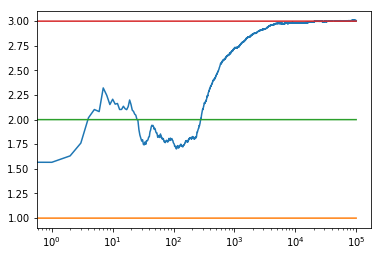

1.3350505791595688
1.8479142528932968
3.008541033970699


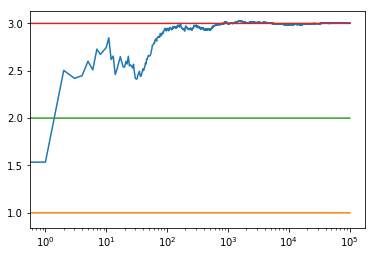

2.661731398888864
2.9699508096002614
3.0033071485127327


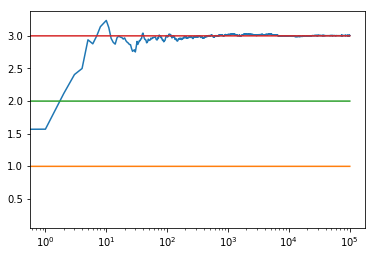

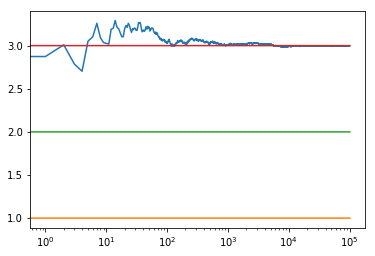

In [4]:
m1 = 1.0
m2 = 2.0
m3 = 3.0
eps = run_experiment_decaying_epsilon(m1, m2, m3, 100000)
oiv = run_experiment_oiv(m1, m2, m3, 100000)
ucb = run_experiment_ucb(m1, m2, m3, 100000)
bayes = run_experiment(m1, m2, m3, 100000)

#### log scale plot

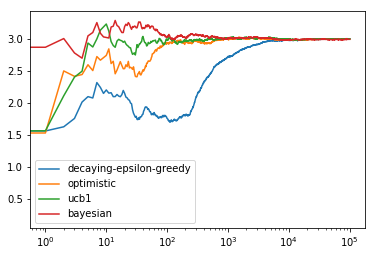

In [5]:
plt.plot(eps, label='decaying-epsilon-greedy')
plt.plot(oiv, label='optimistic')
plt.plot(ucb, label='ucb1')
plt.plot(bayes, label='bayesian')
plt.legend()
plt.xscale('log')
plt.show()